# Problem Statement

To find out countries that are self sufficient in energy production with less level of CO2 emissions and to analyse the different type of energy productions in different regions.


Questions

    1. Which country has highest energy consumption?
    2. Does energy consumption have any relation with average co2 emission factor?
    3. Which region is responsible for high co2 emissions from fuel combustion?
    4. which region has less comsumption of energy?
    5. Is share of electricity consumption is the deciding the numbers of total energy consumption?
    6. what is the trend of energy production across the years?
    7. what is the trend of energy consumption across the years?
    8. which countries have high share of wind and solar in electricity production?
    9. which countries have high share of renewables in electricity production?
    10. which countries have high share of refined oil products?
    11. How does consumption of natural gas consumption affects the Co2 emission?
    12. How does production of electricity consumption affects the Co2 emission?
    13. Which country has the highest energy intensity of GDP at constant purchasing power parity?
    14. What type of relation does energy consumption of countries with energy intensity of GDP at constant purchasing power   parity?
    15. Does countries with high intensity of GDP at constant purchasing power parity have high average co2 emission factor?
    16. Does coal and lignite domestic consumption have any relation with average co2 emission factor?
    17. Which years have high Average CO2 emission factor for all regions?
    18. Which years have high energy intensity of GDP at constant purchasing power parity for all regions?
    19. Does countries with high energy intensity of GDP at constant purchasing power parity has less energy production?
    20. How much impact does coal and lignite production have in total energy production of all countries?

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Energy data 1990 - 2020.csv")
df.columns

Index(['country', 'Year', 'Region',
       'CO2 emissions from fuel combustion (MtCO2)',
       'Average CO2 emission factor (tCO2/toe)',
       'CO2 intensity at constant purchasing power parities (kCO2/$15p)',
       'Total energy production (Mtoe)', 'Total energy consumption (Mtoe)',
       'Share of renewables in electricity production (%)',
       'Share of electricity in total final energy consumption (%)',
       'Oil products domestic consumption (Mt)',
       'Refined oil products production (Mt)', 'Natural gas production (bcm)',
       'Natural gas domestic consumption (bcm)',
       'Energy intensity of GDP at constant purchasing power parities (koe/$15p)',
       'Electricity production (TWh)',
       'Electricity domestic consumption (TWh)',
       'Coal and lignite domestic consumption (Mt)',
       'Share of wind and solar in electricity production (%)',
       'Crude oil production (Mt)', 'Coal and lignite production (Mt)'],
      dtype='object')

In [4]:
df.dtypes

country                                                                      object
Year                                                                          int64
Region                                                                       object
CO2 emissions from fuel combustion (MtCO2)                                  float64
Average CO2 emission factor (tCO2/toe)                                      float64
CO2 intensity at constant purchasing power parities (kCO2/$15p)             float64
Total energy production (Mtoe)                                              float64
Total energy consumption (Mtoe)                                             float64
Share of renewables in electricity production (%)                           float64
Share of electricity in total final energy consumption (%)                  float64
Oil products domestic consumption (Mt)                                      float64
Refined oil products production (Mt)                                        

# Data Cleaning and preprocessing

In [5]:
df.isnull().sum()

country                                                                       0
Year                                                                          0
Region                                                                        0
CO2 emissions from fuel combustion (MtCO2)                                    0
Average CO2 emission factor (tCO2/toe)                                        0
CO2 intensity at constant purchasing power parities (kCO2/$15p)               0
Total energy production (Mtoe)                                                0
Total energy consumption (Mtoe)                                               0
Share of renewables in electricity production (%)                            62
Share of electricity in total final energy consumption (%)                    0
Oil products domestic consumption (Mt)                                        0
Refined oil products production (Mt)                                          0
Natural gas production (bcm)            

In [6]:
df

,country,Year,Region,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),CO2 intensity at constant purchasing power parities (kCO2/$15p),Total energy production (Mtoe),Total energy consumption (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),...,Refined oil products production (Mt),Natural gas production (bcm),Natural gas domestic consumption (bcm),Energy intensity of GDP at constant purchasing power parities (koe/$15p),Electricity production (TWh),Electricity domestic consumption (TWh),Coal and lignite domestic consumption (Mt),Share of wind and solar in electricity production (%),Crude oil production (Mt),Coal and lignite production (Mt)
0,Algeria,1990,Arab States,52.981921,2.387855,0.228889,100.112749,22.188078,0.782972,8.376592,...,25.395000,45.68403547,14.301991,0.095856,17.242000,13.693000,0.94,NaN,57.850000,NaN
1,Algeria,1991,Arab States,57.149971,2.435026,0.249895,102.586171,23.469959,1.580793,7.994748,...,25.435000,49.53198889,15.312995,0.102625,18.535000,14.058000,1.171,NaN,57.076000,NaN
2,Algeria,1992,Arab States,57.262430,2.383517,0.245959,104.205908,24.024343,1.022926,8.490068,...,25.459000,51.67001137,15.727010,0.103192,19.454000,15.130000,1.056,NaN,56.904000,NaN
3,Algeria,1993,Arab States,59.198702,2.455335,0.259730,104.928745,24.110238,1.709195,8.291029,...,25.463000,52.38599054,16.596984,0.105782,20.653000,15.144000,1.015,NaN,56.995000,NaN
4,Algeria,1994,Arab States,56.347927,2.424649,0.249468,100.612596,23.239627,0.783869,9.170605,...,23.971000,48.20601995,16.117004,0.102888,21.177000,15.545000,0.943,NaN,56.312000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,Venezuela,2016,South/Latin America,130.244135,2.214743,0.304632,169.124743,58.807791,58.377863,19.308332,...,42.060000,24.47599903,22.692979,0.137547,107.981000,73.420000,0.202,0.07223493,131.988000,0.9
1360,Venezuela,2017,South/Latin America,124.106123,2.222989,0.344218,148.976952,55.828488,58.379586,19.658549,...,36.647685,24.00755269,22.803576,0.154845,103.777449,70.153699,0.112222,0.075160838,113.220110,0.5
1361,Venezuela,2018,South/Latin America,113.249553,2.701646,0.390782,115.312748,41.918720,58.380532,20.319222,...,31.411686,23.70998143,23.828481,0.144646,99.738223,66.530345,0.044889,0.077432701,84.860873,0.2
1362,Venezuela,2019,South/Latin America,101.200206,2.793624,0.537237,81.895069,36.225425,58.377040,21.292363,...,29.023761,19.59998465,21.197943,0.192308,96.463748,64.427278,0.029469014,0.073940761,56.900109,0.29820421


In [7]:
categorical = df.select_dtypes(exclude="number")
categorical

,country,Region,Natural gas production (bcm),Coal and lignite domestic consumption (Mt),Share of wind and solar in electricity production (%),Coal and lignite production (Mt)
0,Algeria,Arab States,45.68403547,0.94,NaN,NaN
1,Algeria,Arab States,49.53198889,1.171,NaN,NaN
2,Algeria,Arab States,51.67001137,1.056,NaN,NaN
3,Algeria,Arab States,52.38599054,1.015,NaN,NaN
4,Algeria,Arab States,48.20601995,0.943,NaN,NaN
...,...,...,...,...,...,...
1359,Venezuela,South/Latin America,24.47599903,0.202,0.07223493,0.9
1360,Venezuela,South/Latin America,24.00755269,0.112222,0.075160838,0.5
1361,Venezuela,South/Latin America,23.70998143,0.044889,0.077432701,0.2
1362,Venezuela,South/Latin America,19.59998465,0.029469014,0.073940761,0.29820421


In [8]:
# Changing the datatypes

df['Natural gas production (bcm)'] = pd.to_numeric(df['Natural gas production (bcm)'], errors='coerce')
df['Coal and lignite domestic consumption (Mt)'] = pd.to_numeric(df['Coal and lignite domestic consumption (Mt)'], errors='coerce')
df['Share of wind and solar in electricity production (%)'] = pd.to_numeric(df['Share of wind and solar in electricity production (%)'], errors='coerce')
df['Coal and lignite production (Mt)'] = pd.to_numeric(df['Coal and lignite production (Mt)'], errors='coerce')


In [9]:
continuous = df.select_dtypes(include="number")
continuous

,Year,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),CO2 intensity at constant purchasing power parities (kCO2/$15p),Total energy production (Mtoe),Total energy consumption (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),Oil products domestic consumption (Mt),Refined oil products production (Mt),Natural gas production (bcm),Natural gas domestic consumption (bcm),Energy intensity of GDP at constant purchasing power parities (koe/$15p),Electricity production (TWh),Electricity domestic consumption (TWh),Coal and lignite domestic consumption (Mt),Share of wind and solar in electricity production (%),Crude oil production (Mt),Coal and lignite production (Mt)
0,1990,52.981921,2.387855,0.228889,100.112749,22.188078,0.782972,8.376592,8.080000,25.395000,45.684035,14.301991,0.095856,17.242000,13.693000,0.940000,NaN,57.850000,NaN
1,1991,57.149971,2.435026,0.249895,102.586171,23.469959,1.580793,7.994748,8.450000,25.435000,49.531989,15.312995,0.102625,18.535000,14.058000,1.171000,NaN,57.076000,NaN
2,1992,57.262430,2.383517,0.245959,104.205908,24.024343,1.022926,8.490068,8.349000,25.459000,51.670011,15.727010,0.103192,19.454000,15.130000,1.056000,NaN,56.904000,NaN
3,1993,59.198702,2.455335,0.259730,104.928745,24.110238,1.709195,8.291029,8.390000,25.463000,52.385991,16.596984,0.105782,20.653000,15.144000,1.015000,NaN,56.995000,NaN
4,1994,56.347927,2.424649,0.249468,100.612596,23.239627,0.783869,9.170605,7.562000,23.971000,48.206020,16.117004,0.102888,21.177000,15.545000,0.943000,NaN,56.312000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,2016,130.244135,2.214743,0.304632,169.124743,58.807791,58.377863,19.308332,27.675000,42.060000,24.475999,22.692979,0.137547,107.981000,73.420000,0.202000,0.072235,131.988000,0.900000
1360,2017,124.106123,2.222989,0.344218,148.976952,55.828488,58.379586,19.658549,25.275156,36.647685,24.007553,22.803576,0.154845,103.777449,70.153699,0.112222,0.075161,113.220110,0.500000
1361,2018,113.249553,2.701646,0.390782,115.312748,41.918720,58.380532,20.319222,22.891802,31.411686,23.709981,23.828481,0.144646,99.738223,66.530345,0.044889,0.077433,84.860873,0.200000
1362,2019,101.200206,2.793624,0.537237,81.895069,36.225425,58.377040,21.292363,20.825058,29.023761,19.599985,21.197943,0.192308,96.463748,64.427278,0.029469,0.073941,56.900109,0.298204


In [10]:
numerical = list(df.columns)
numerical = numerical[3:]
numerical

['CO2 emissions from fuel combustion (MtCO2)',
 'Average CO2 emission factor (tCO2/toe)',
 'CO2 intensity at constant purchasing power parities (kCO2/$15p)',
 'Total energy production (Mtoe)',
 'Total energy consumption (Mtoe)',
 'Share of renewables in electricity production (%)',
 'Share of electricity in total final energy consumption (%)',
 'Oil products domestic consumption (Mt)',
 'Refined oil products production (Mt)',
 'Natural gas production (bcm)',
 'Natural gas domestic consumption (bcm)',
 'Energy intensity of GDP at constant purchasing power parities (koe/$15p)',
 'Electricity production (TWh)',
 'Electricity domestic consumption (TWh)',
 'Coal and lignite domestic consumption (Mt)',
 'Share of wind and solar in electricity production (%)',
 'Crude oil production (Mt)',
 'Coal and lignite production (Mt)']

In [11]:
# For replacing a string value in the numeric column
df = df.replace("n.a.",0)

In [12]:
# Impute missing values with the median of each country
for col in numerical:
    df[col] = df[col].fillna(df.groupby('country')[col].transform(pd.Series.median))

In [13]:
# Filling the missing values with 0 for some countries which have no way of calculations for imputation
df.fillna(value=0, inplace=True)

In [14]:
# exporting the dataframe to excel file for tableau visualizations
df.to_excel("Preprocessed_Energy data 1990 - 2020.xlsx",index=False)

In [15]:
# After cleaning and preprocessing
df.isnull().sum()

country                                                                     0
Year                                                                        0
Region                                                                      0
CO2 emissions from fuel combustion (MtCO2)                                  0
Average CO2 emission factor (tCO2/toe)                                      0
CO2 intensity at constant purchasing power parities (kCO2/$15p)             0
Total energy production (Mtoe)                                              0
Total energy consumption (Mtoe)                                             0
Share of renewables in electricity production (%)                           0
Share of electricity in total final energy consumption (%)                  0
Oil products domestic consumption (Mt)                                      0
Refined oil products production (Mt)                                        0
Natural gas production (bcm)                                    

# Data Analysis

In [16]:
# Total energy production across regions

In [17]:
avg_area = pd.pivot_table(df, index=['Region'], values=['Total energy production (Mtoe)'], aggfunc='median')
avg_area_sort = avg_area.sort_values(by = "Total energy production (Mtoe)")

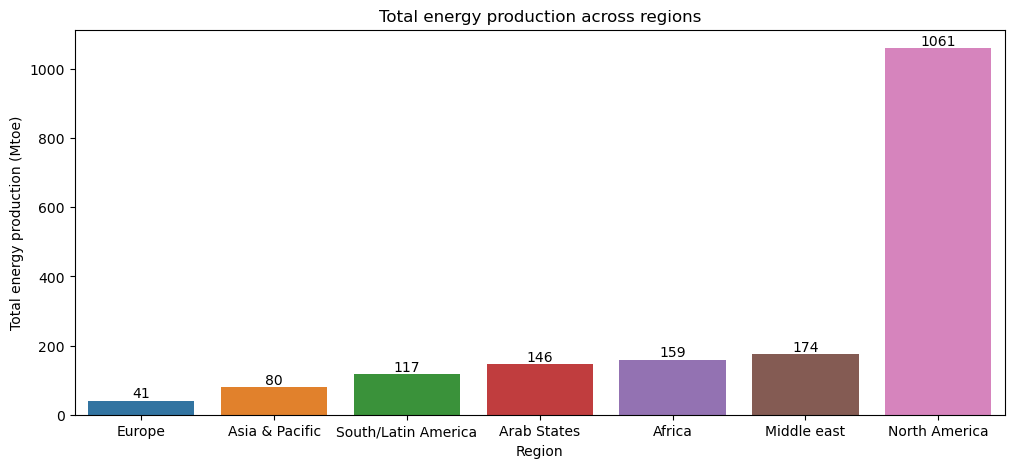

In [18]:
fig, ax = plt.subplots(figsize= (12, 5))
plt.title("Total energy production across regions")
ax = sns.barplot (x=avg_area_sort.index,y="Total energy production (Mtoe)",data=avg_area_sort)
for bar in ax.patches:
    x = bar.get_x() + bar.get_width() /2
    y = bar.get_height()
    ax.annotate(round(bar.get_height()), (x, y), va = "bottom", ha ="center" )

In [19]:
# Total energy consumption across regions

In [20]:
avg_area = pd.pivot_table(df, index=['Region'], values=['Total energy consumption (Mtoe)'], aggfunc='median')
avg_area_sort = avg_area.sort_values(by = "Total energy consumption (Mtoe)")

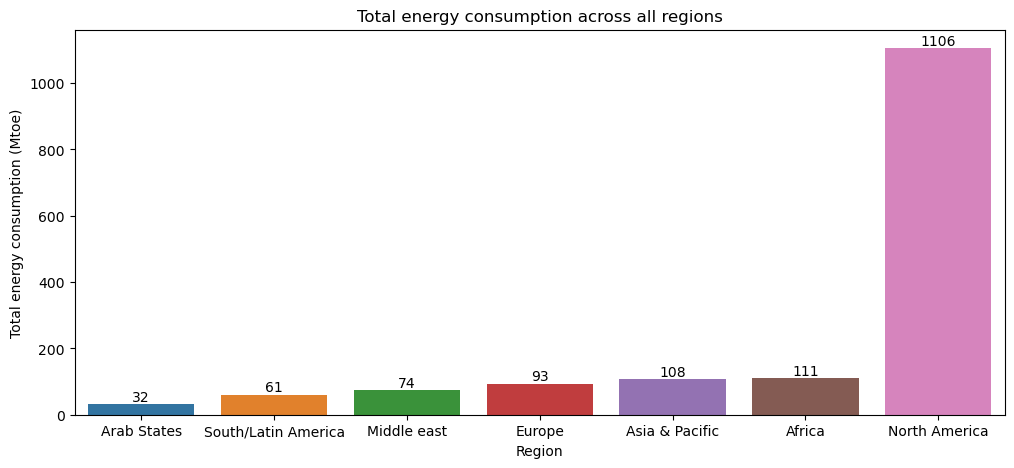

In [21]:
fig, ax = plt.subplots(figsize= (12, 5))
plt.title("Total energy consumption across all regions")
ax = sns.barplot (x=avg_area_sort.index,y="Total energy consumption (Mtoe)",data=avg_area_sort)
for bar in ax.patches:
    x = bar.get_x() + bar.get_width() /2
    y = bar.get_height()
    ax.annotate(round(bar.get_height()), (x, y), va = "bottom", ha ="center" )

In [22]:
# Region wise Total Electricity production

In [23]:
avg_area = pd.pivot_table(df, index=['Region'], values=['Electricity production (TWh)'], aggfunc='median')
avg_area_sort = avg_area.sort_values(by = "Electricity production (TWh)")


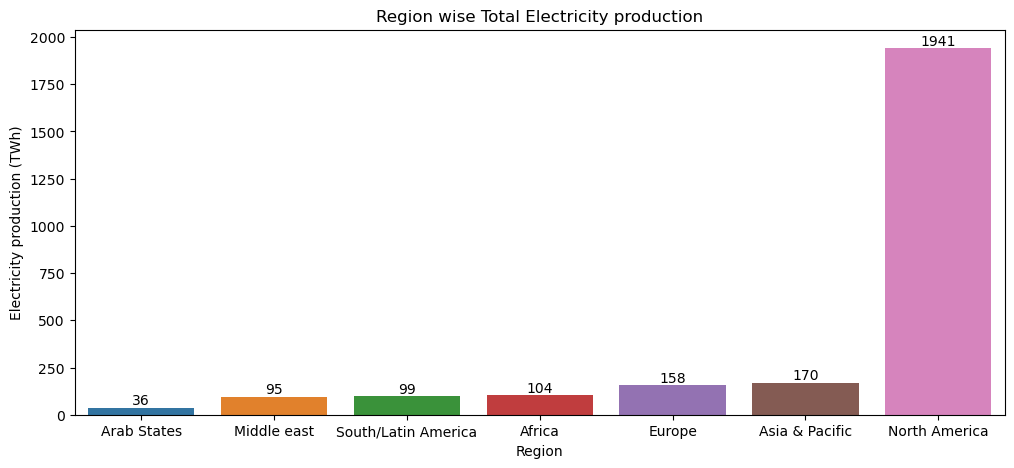

In [24]:
fig, ax = plt.subplots(figsize= (12, 5))
plt.title("Region wise Total Electricity production")
ax = sns.barplot (x=avg_area_sort.index,y="Electricity production (TWh)",data=avg_area_sort)
for bar in ax.patches:
    x = bar.get_x() + bar.get_width() /2
    y = bar.get_height()
    ax.annotate(round(bar.get_height()), (x, y), va = "bottom", ha ="center" )

In [25]:
# Country wise Total Electricity production

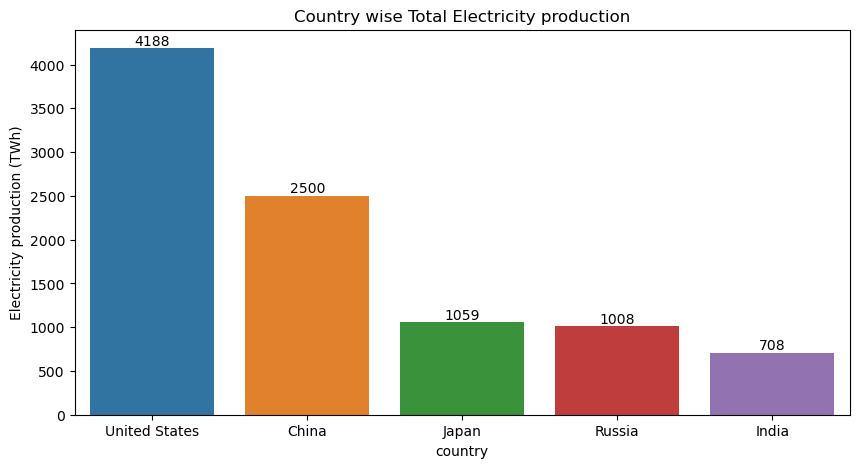

In [26]:
avg_area = pd.pivot_table(df, index=['country'], values=['Electricity production (TWh)'], aggfunc='median')
avg_area_sort = avg_area.sort_values(by = "Electricity production (TWh)", ascending=False)
top5 = avg_area_sort.head()
fig, ax = plt.subplots(figsize= (10, 5))
plt.title("Country wise Total Electricity production")
ax = sns.barplot (x=top5.index,y="Electricity production (TWh)",data=top5)
for bar in ax.patches:
    x = bar.get_x() + bar.get_width() /2
    y = bar.get_height()
    ax.annotate(round(bar.get_height()), (x, y), va = "bottom", ha ="center" )

In [27]:
# Region wise share of renewables in electricity production

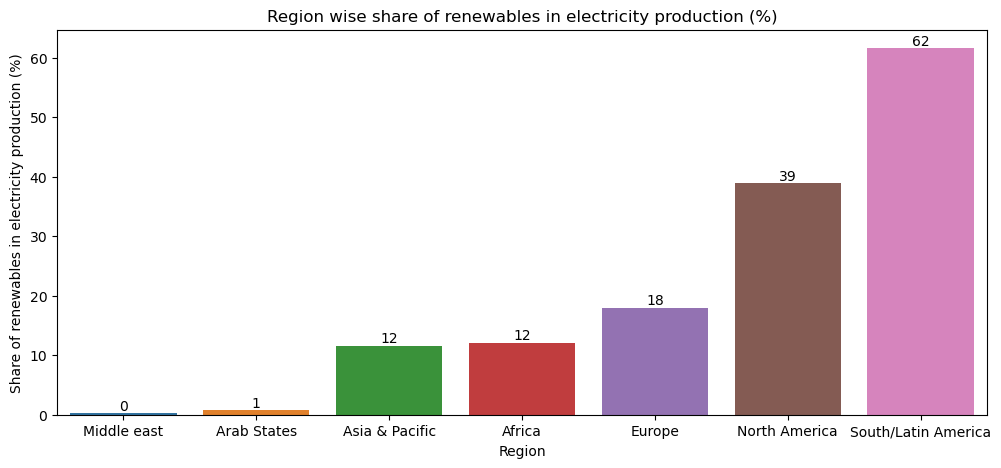

In [28]:
avg_area = pd.pivot_table(df, index=['Region'], values=['Share of renewables in electricity production (%)'], aggfunc='median')
avg_area_sort = avg_area.sort_values(by = "Share of renewables in electricity production (%)")
fig, ax = plt.subplots(figsize= (12, 5))
plt.title("Region wise share of renewables in electricity production (%)")
ax = sns.barplot (x=avg_area_sort.index,y="Share of renewables in electricity production (%)",data=avg_area_sort)
for bar in ax.patches:
    x = bar.get_x() + bar.get_width() /2
    y = bar.get_height()
    ax.annotate(round(bar.get_height()), (x, y), va = "bottom", ha ="center" )

In [29]:
# Region wise share of wind and solar in electricity production

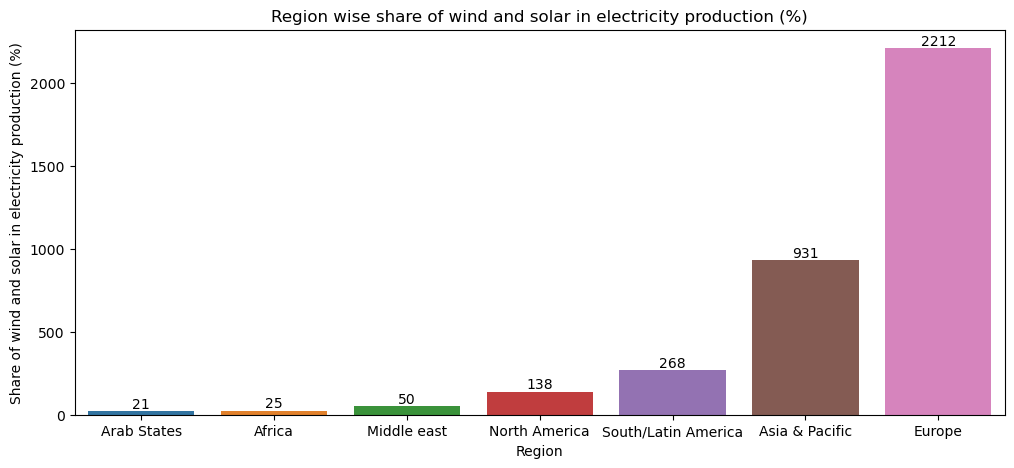

In [30]:
avg_area = pd.pivot_table(df, index=['Region'], values=['Share of wind and solar in electricity production (%)'], aggfunc='sum')
avg_area_sort = avg_area.sort_values(by = "Share of wind and solar in electricity production (%)")
fig, ax = plt.subplots(figsize= (12, 5))
plt.title("Region wise share of wind and solar in electricity production (%)")
ax = sns.barplot (x=avg_area_sort.index,y="Share of wind and solar in electricity production (%)",data=avg_area_sort)
for bar in ax.patches:
    x = bar.get_x() + bar.get_width() /2
    y = bar.get_height()
    ax.annotate(round(bar.get_height()), (x, y), va = "bottom", ha ="center" )

In [31]:
# Region wise Natural gas production (bcm)

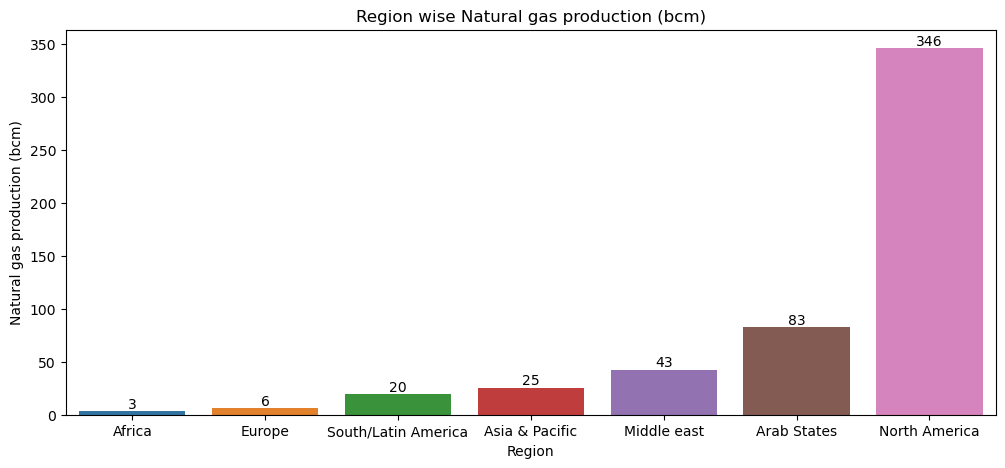

In [32]:
avg_area = pd.pivot_table(df, index=['Region'], values=['Natural gas production (bcm)'], aggfunc='median')
avg_area_sort = avg_area.sort_values(by = "Natural gas production (bcm)")
fig, ax = plt.subplots(figsize= (12, 5))
plt.title("Region wise Natural gas production (bcm)")
ax = sns.barplot (x=avg_area_sort.index,y="Natural gas production (bcm)",data=avg_area_sort)
for bar in ax.patches:
    x = bar.get_x() + bar.get_width() /2
    y = bar.get_height()
    ax.annotate(round(bar.get_height()), (x, y), va = "bottom", ha ="center" )

In [33]:
# Country wise Energy intensity of GDP at constant purchasing power parities

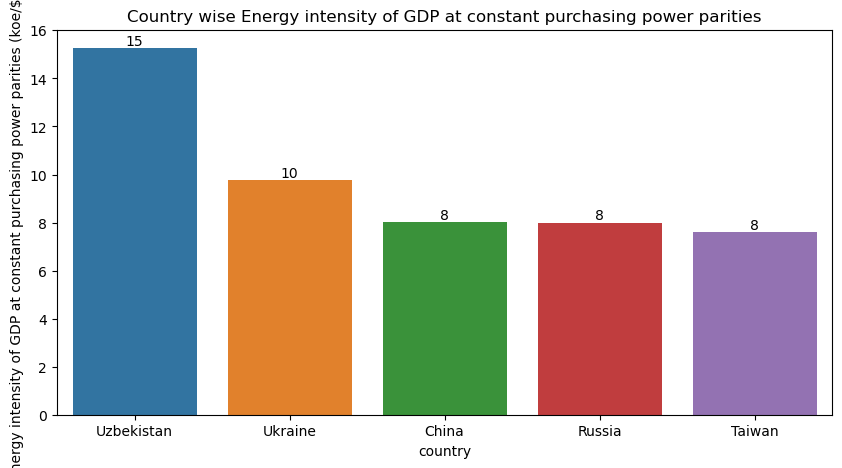

In [34]:
avg_area = pd.pivot_table(df, index=['country'], values=['Energy intensity of GDP at constant purchasing power parities (koe/$15p)'], aggfunc='sum')
avg_area_sort = avg_area.sort_values(by = "Energy intensity of GDP at constant purchasing power parities (koe/$15p)", ascending=False)
top5 = avg_area_sort.head()
fig, ax = plt.subplots(figsize= (10, 5))
plt.title("Country wise Energy intensity of GDP at constant purchasing power parities")
ax = sns.barplot (x=top5.index,y="Energy intensity of GDP at constant purchasing power parities (koe/$15p)",data=top5)
for bar in ax.patches:
    x = bar.get_x() + bar.get_width() /2
    y = bar.get_height()
    ax.annotate(round(bar.get_height()), (x, y), va = "bottom", ha ="center" )

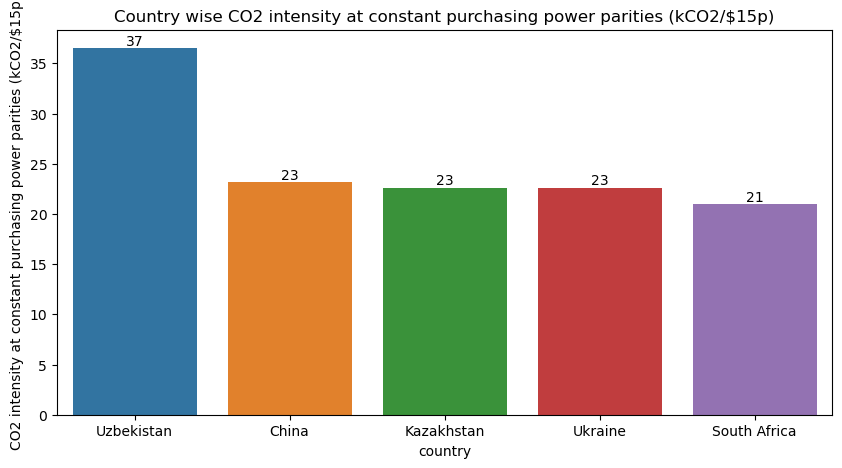

In [66]:
avg_area = pd.pivot_table(df, index=['country'], values=['CO2 intensity at constant purchasing power parities (kCO2/$15p)'], aggfunc='sum')
avg_area_sort = avg_area.sort_values(by = "CO2 intensity at constant purchasing power parities (kCO2/$15p)", ascending=False)
top5 = avg_area_sort.head()
fig, ax = plt.subplots(figsize= (10, 5))
plt.title("Country wise CO2 intensity at constant purchasing power parities (kCO2/$15p)")
ax = sns.barplot (x=top5.index,y="CO2 intensity at constant purchasing power parities (kCO2/$15p)",data=top5)
for bar in ax.patches:
    x = bar.get_x() + bar.get_width() /2
    y = bar.get_height()
    ax.annotate(round(bar.get_height()), (x, y), va = "bottom", ha ="center" )

In [35]:
# Region wise comparison of Electricity production and Crude oil production

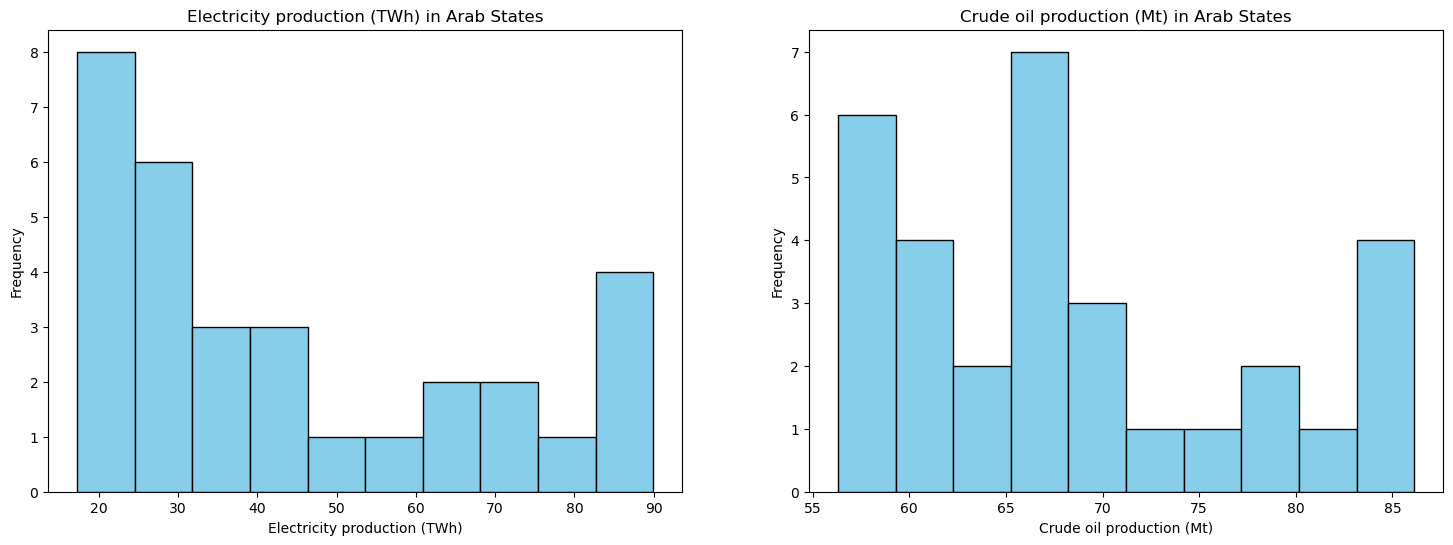

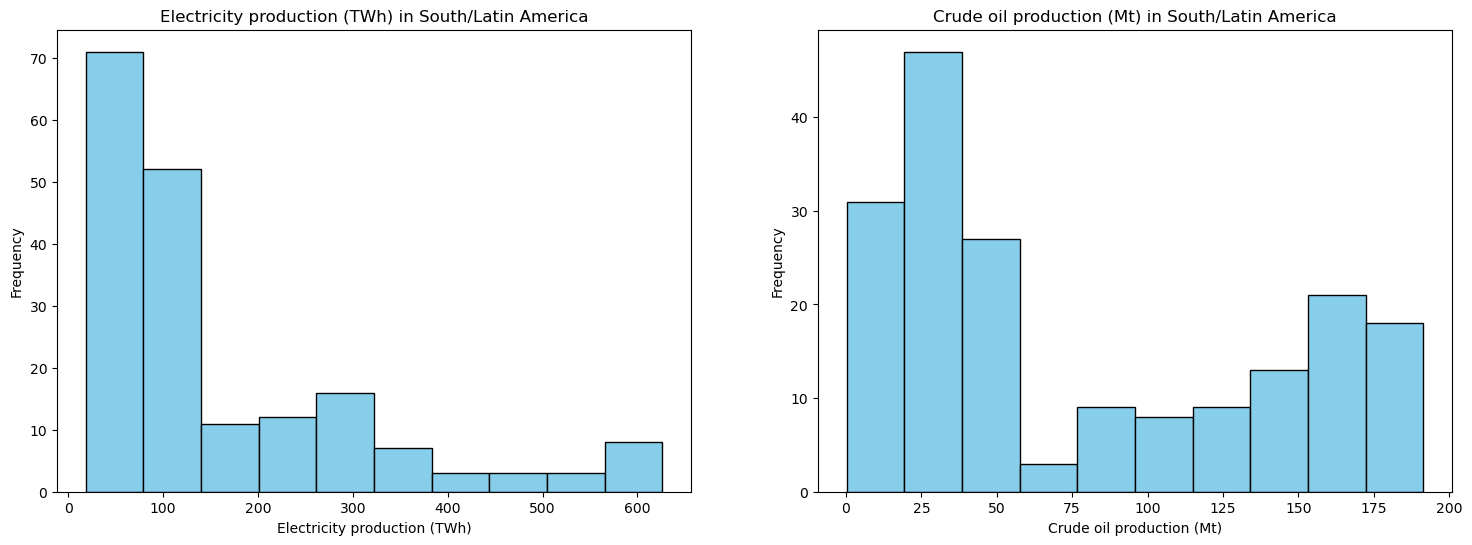

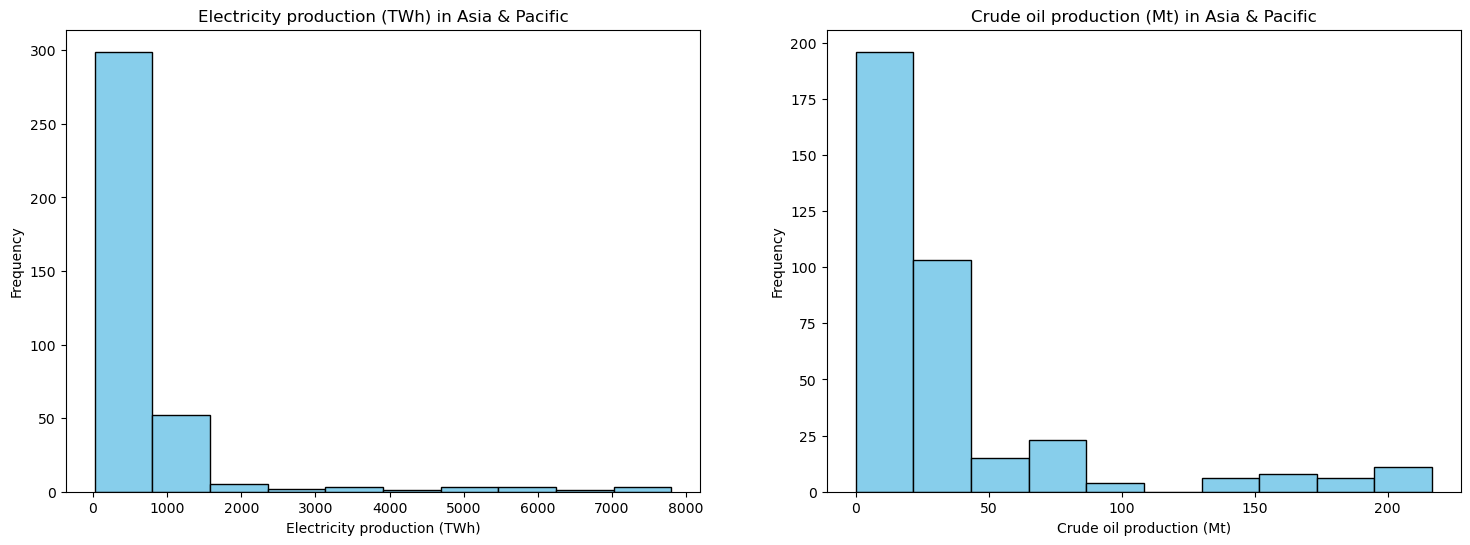

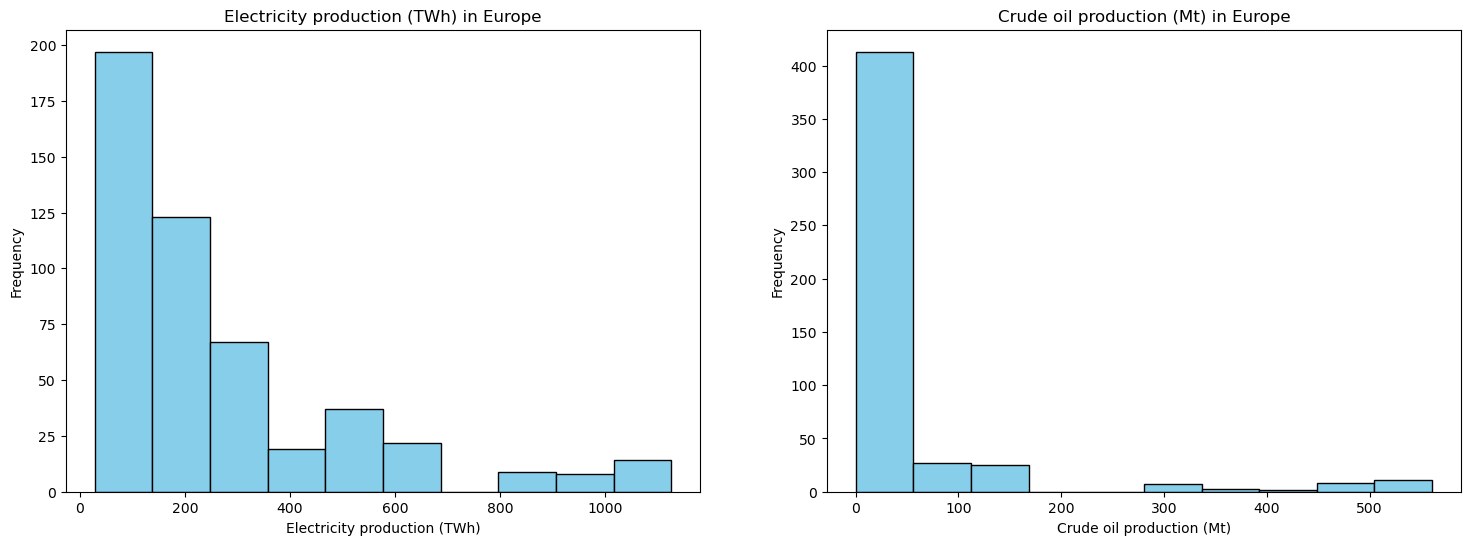

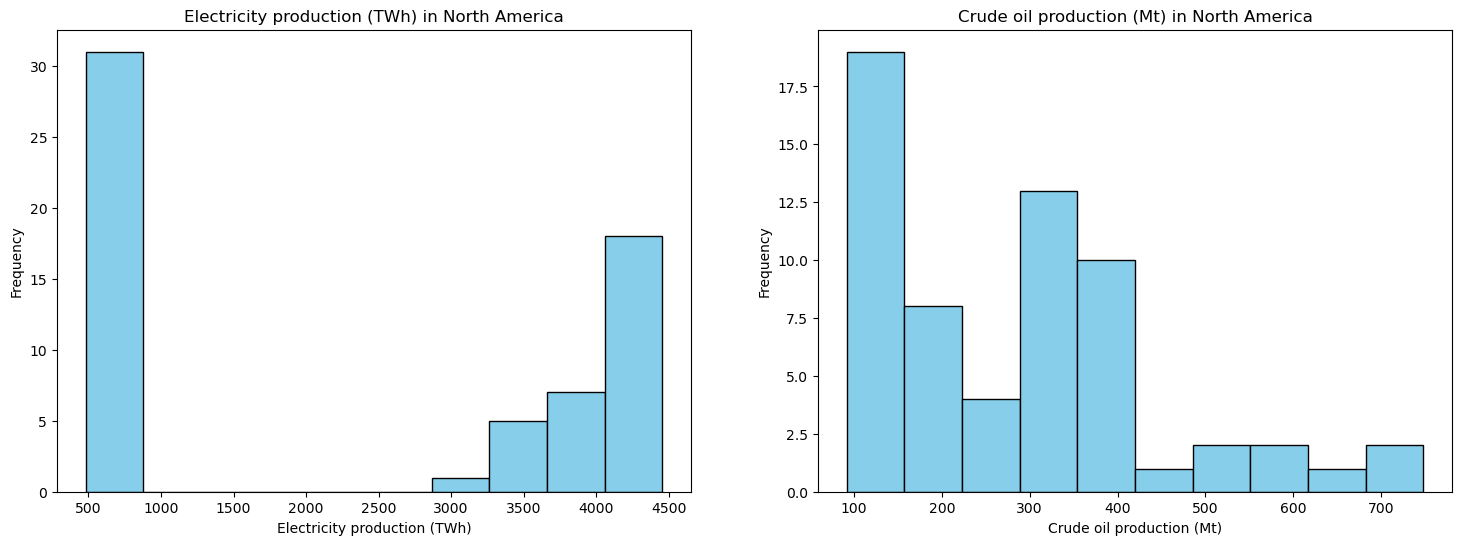

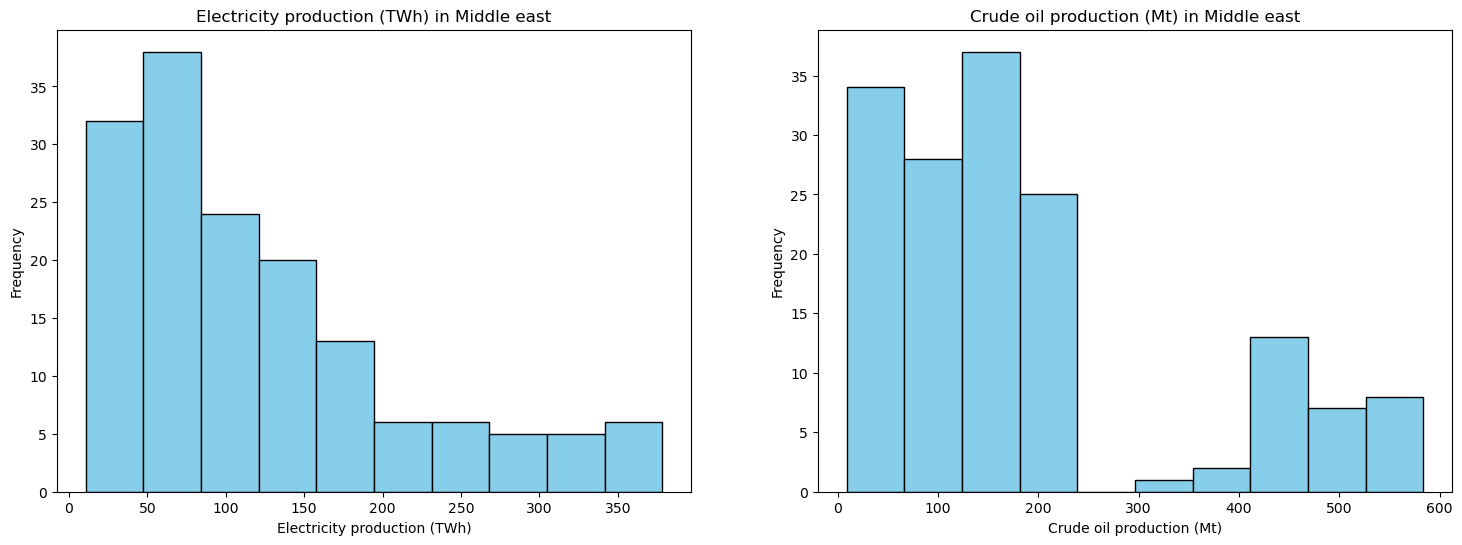

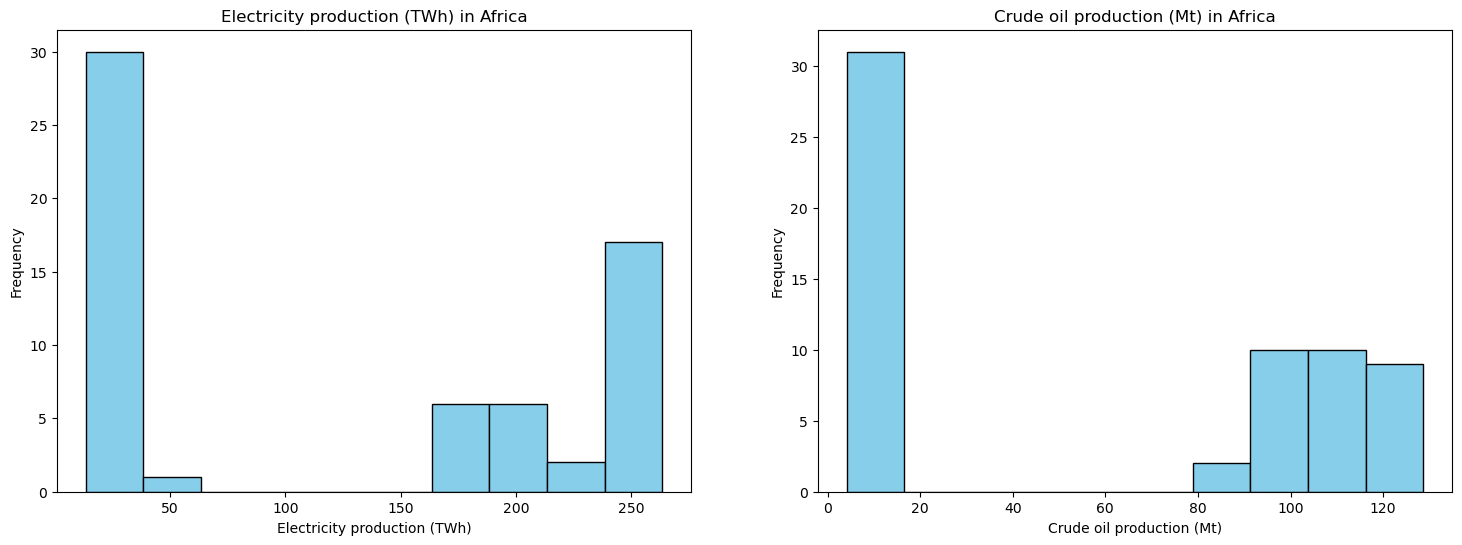

In [36]:
region = df['Region'].unique()

for city in region:
    subset = df[df['Region'] == city]
    plt.figure(figsize=(18, 6))
    
    # Create a subplot for each variable
    for i, variable in enumerate(['Electricity production (TWh)', 'Crude oil production (Mt)']):
        plt.subplot(1, 2, i + 1)
        plt.hist(subset[variable], bins=10, color='skyblue', edgecolor='black')
        plt.title(f'{variable} in {city}')
        plt.xlabel(variable)
        plt.ylabel('Frequency')

In [37]:
# nalysis on Total energy consumption (Mtoe) and CO2 emissions from fuel combustion (MtCO2)

Text(0.5, 1.0, 'Analysis on Total energy consumption (Mtoe) and CO2 emissions from fuel combustion (MtCO2)')

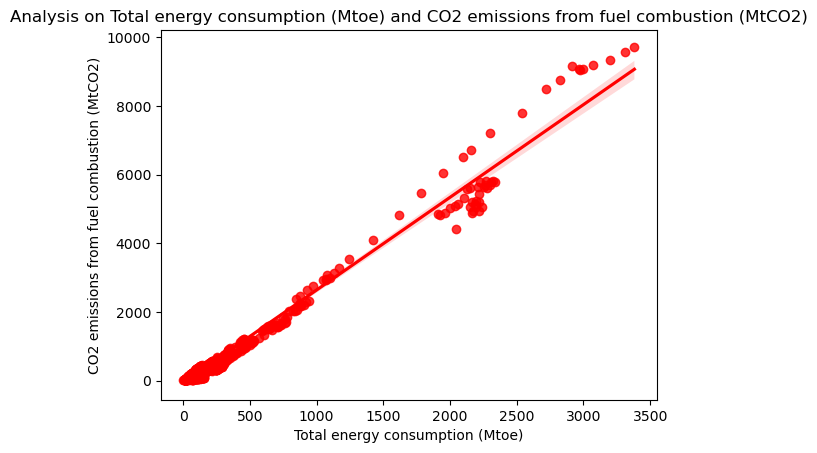

In [38]:
sns.regplot(x=df["Total energy consumption (Mtoe)"],y=df["CO2 emissions from fuel combustion (MtCO2)"],color='Red')
plt.title("Analysis on Total energy consumption (Mtoe) and CO2 emissions from fuel combustion (MtCO2)")

In [39]:
# Strong positive Correlation between energy consumption and fuel combustion

In [40]:
# Analysis on CO2 intensity at constant purchasing power parities (kCO2/$15p) and CO2 emissions from fuel combustion (MtCO2)

Text(0.5, 1.0, 'Analysis on CO2 intensity at constant purchasing power parities (kCO2/$15p) and CO2 emissions from fuel combustion (MtCO2)')

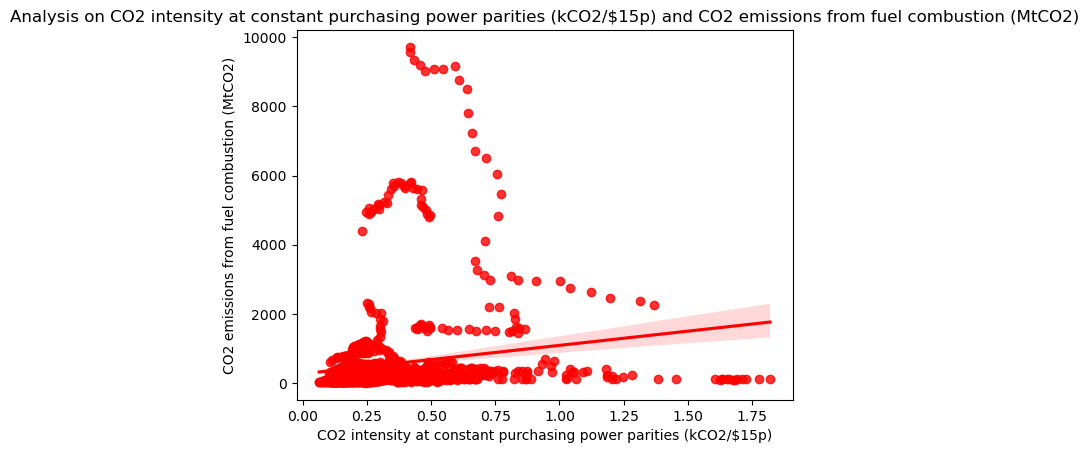

In [41]:
sns.regplot(x=df["CO2 intensity at constant purchasing power parities (kCO2/$15p)"],y=df["CO2 emissions from fuel combustion (MtCO2)"],color='Red')
plt.title("Analysis on CO2 intensity at constant purchasing power parities (kCO2/$15p) and CO2 emissions from fuel combustion (MtCO2)")

In [42]:
# Positive Correlation between CO2 intensity at constant purchasing power parities and fuel combustion

In [43]:
# Analysis on Average CO2 emission factor (tCO2/toe) and CO2 emissions from fuel combustion (MtCO2)

Text(0.5, 1.0, 'Analysis on Average CO2 emission factor (tCO2/toe) and CO2 emissions from fuel combustion (MtCO2)')

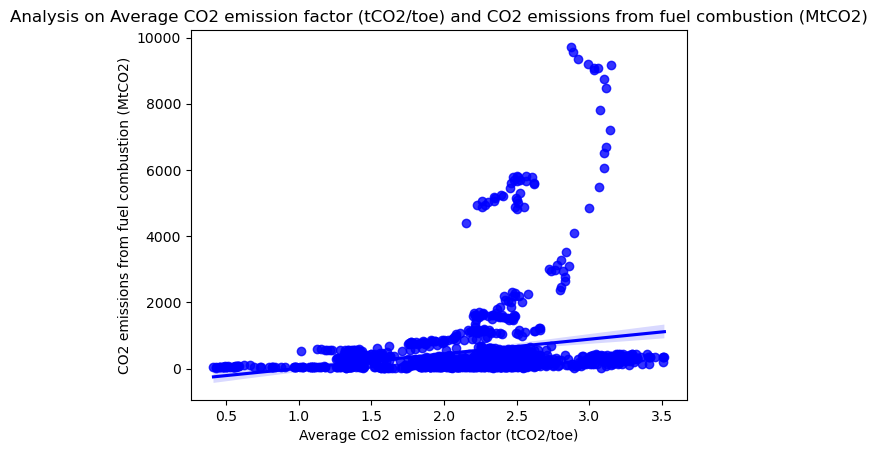

In [65]:
sns.regplot(x=df["Average CO2 emission factor (tCO2/toe)"],y=df["CO2 emissions from fuel combustion (MtCO2)"],color='Blue')
plt.title("Analysis on Average CO2 emission factor (tCO2/toe) and CO2 emissions from fuel combustion (MtCO2)")

In [45]:
# Positive Correlation between Average CO2 emission factor and fuel combustion

In [46]:
# Analysis on Year wise CO2 emissions from fuel combustion

Text(0.5, 1.0, 'Year wise average CO2 emission ')

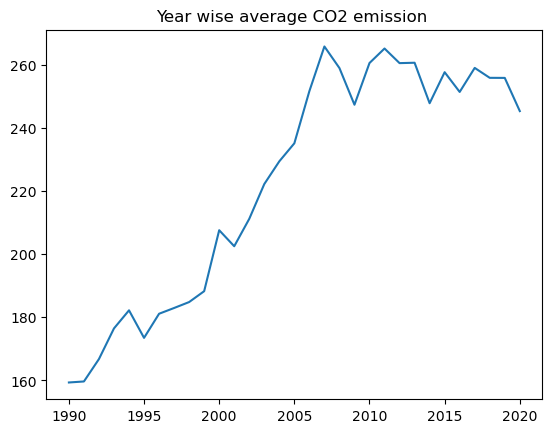

In [64]:
year = df.groupby(by=["Year"])["CO2 emissions from fuel combustion (MtCO2)"].median()
plt.plot(year.index,year.values)
plt.title("Year wise average CO2 emission ")

Text(0.5, 1.0, 'Year wise trnd of average total energy production (Mtoe) ')

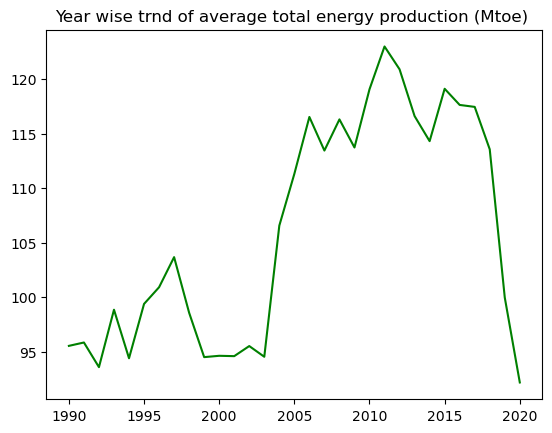

In [78]:
year = df.groupby(by=["Year"])["Total energy production (Mtoe)"].median()
plt.plot(year.index,year.values, color="Green")
plt.title("Year wise trnd of average total energy production (Mtoe) ")

Text(0.5, 1.0, 'Year wise trnd of average total energy consumption (Mtoe) ')

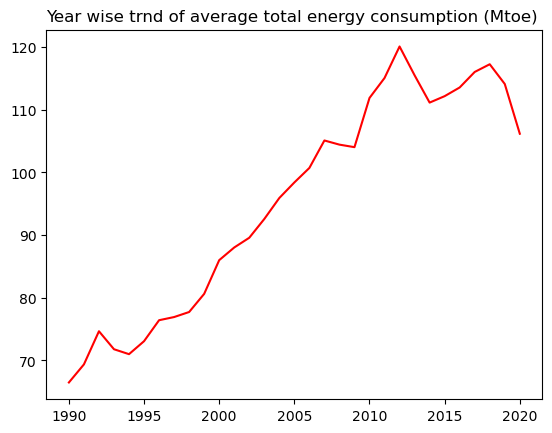

In [77]:
year = df.groupby(by=["Year"])["Total energy consumption (Mtoe)"].median()
plt.plot(year.index,year.values, color="Red")
plt.title("Year wise trnd of average total energy consumption (Mtoe) ")

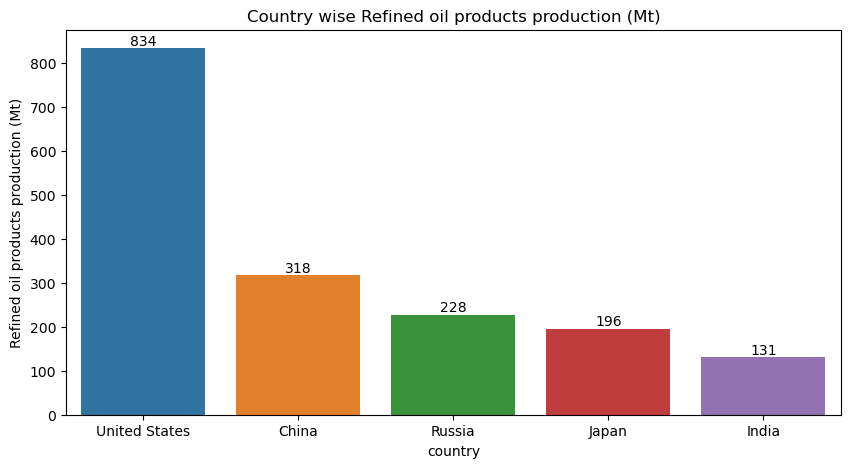

In [83]:
avg_area = pd.pivot_table(df, index=['country'], values=['Refined oil products production (Mt)'], aggfunc='median')
avg_area_sort = avg_area.sort_values(by = "Refined oil products production (Mt)", ascending=False)
top5 = avg_area_sort.head()
fig, ax = plt.subplots(figsize= (10, 5))
plt.title("Country wise Refined oil products production (Mt)")
ax = sns.barplot (x=top5.index,y="Refined oil products production (Mt)",data=top5)
for bar in ax.patches:
    x = bar.get_x() + bar.get_width() /2
    y = bar.get_height()
    ax.annotate(round(bar.get_height()), (x, y), va = "bottom", ha ="center" )



In [48]:
# Eco planet Filter

In [49]:
eco = df[(df["Average CO2 emission factor (tCO2/toe)"] < 1) & (df["Total energy consumption (Mtoe)"] < 60)]
eco

,country,Year,Region,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),CO2 intensity at constant purchasing power parities (kCO2/$15p),Total energy production (Mtoe),Total energy consumption (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),...,Refined oil products production (Mt),Natural gas production (bcm),Natural gas domestic consumption (bcm),Energy intensity of GDP at constant purchasing power parities (koe/$15p),Electricity production (TWh),Electricity domestic consumption (TWh),Coal and lignite domestic consumption (Mt),Share of wind and solar in electricity production (%),Crude oil production (Mt),Coal and lignite production (Mt)
1069,Sweden,2005,Europe,50.397141,0.977231,0.128004,34.543493,51.571358,51.315682,31.888978,...,19.800000,0.0,0.839000,0.130987,158.435000,135.418000,4.563000,0.591410,0.003,0.708
1071,Sweden,2007,Europe,48.916371,0.979630,0.114837,33.310925,49.933509,52.058796,31.959922,...,17.953000,0.0,0.930001,0.117225,148.922000,135.641000,4.610586,0.959563,0.003,0.520
1072,Sweden,2008,Europe,47.993213,0.968521,0.112943,32.981569,49.553119,54.352897,32.109920,...,20.879000,0.0,0.797000,0.116614,150.038000,133.256000,4.775801,1.334329,0.003,0.837
1073,Sweden,2009,Europe,44.117897,0.972050,0.108416,30.096450,45.386452,58.459794,32.507247,...,20.248000,0.0,1.238999,0.111534,136.735000,127.944000,3.513510,1.826891,0.003,0.702
1074,Sweden,2010,Europe,49.207215,0.967228,0.113875,32.813830,50.874462,55.328244,31.696062,...,20.769000,0.0,1.572000,0.117734,148.548000,136.634000,4.637985,2.353448,0.003,0.797
1075,Sweden,2011,Europe,44.817843,0.904032,0.100645,32.677782,49.575526,55.988830,31.766515,...,19.620000,0.0,1.315000,0.111329,150.405000,128.961000,4.183278,4.067684,0.003,0.736
1076,Sweden,2012,Europe,42.021559,0.839083,0.094965,35.585392,50.080333,59.098468,32.387584,...,21.409000,0.0,1.178001,0.113177,166.561000,132.116000,3.530678,4.312534,0.003,0.472
1077,Sweden,2013,Europe,40.562616,0.823268,0.090682,34.590131,49.270224,54.074011,32.318603,...,17.584000,0.0,1.077001,0.110148,153.166000,129.341000,3.565697,6.448559,0.003,0.624
1078,Sweden,2014,Europe,39.240445,0.816536,0.085380,34.279830,48.057205,55.869012,32.359903,...,19.799000,0.0,0.919999,0.104564,153.663000,126.845000,3.248284,7.342041,0.003,0.450
1079,Sweden,2015,Europe,38.958300,0.878187,0.081177,33.807814,44.362169,63.303765,32.691853,...,21.367000,0.0,0.964000,0.092438,162.112000,129.275000,3.176324,10.128183,0.003,0.369


In [50]:
# Sweden is the best eco country as it has less pollution causing factors

In [51]:
# Self efficient and less Co2 emitting countries

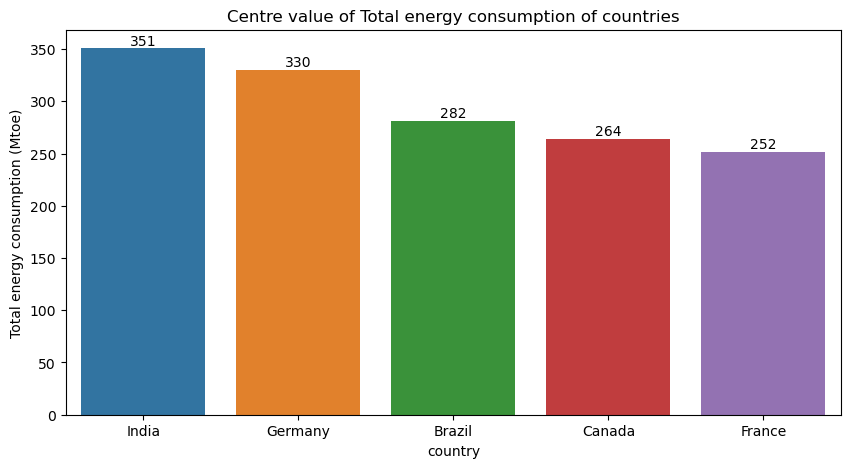

In [79]:
# filter
fuel = df[(df["Average CO2 emission factor (tCO2/toe)"] < 2) & 
          (df["Total energy consumption (Mtoe)"] > 200) & 
          (df['Energy intensity of GDP at constant purchasing power parities (koe/$15p)'] < 5)]

# Visual based on energy consumption
fuel_ = pd.pivot_table(fuel, index=['country'], values=['Total energy consumption (Mtoe)'], aggfunc='median')
fuel_sort = fuel_.sort_values(by = "Total energy consumption (Mtoe)", ascending=False)
top10 = fuel_sort.head(10)
fig, ax = plt.subplots(figsize= (10, 5))
plt.title("Centre value of Total energy consumption of countries")
ax = sns.barplot (x=top10.index,y="Total energy consumption (Mtoe)",data=top10)
for bar in ax.patches:
    x = bar.get_x() + bar.get_width() /2
    y = bar.get_height()
    ax.annotate(round(bar.get_height()), (x, y), va = "bottom", ha ="center" )

In [53]:
# India is the top Self efficient and less Co2 emitting country

In [54]:
# Correlation maps for better understanding of relationship among columns

C:\Users\Sethunarayanan\AppData\Local\Temp\ipykernel_6172\4166045883.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix2 = df.corr()


<Axes: >

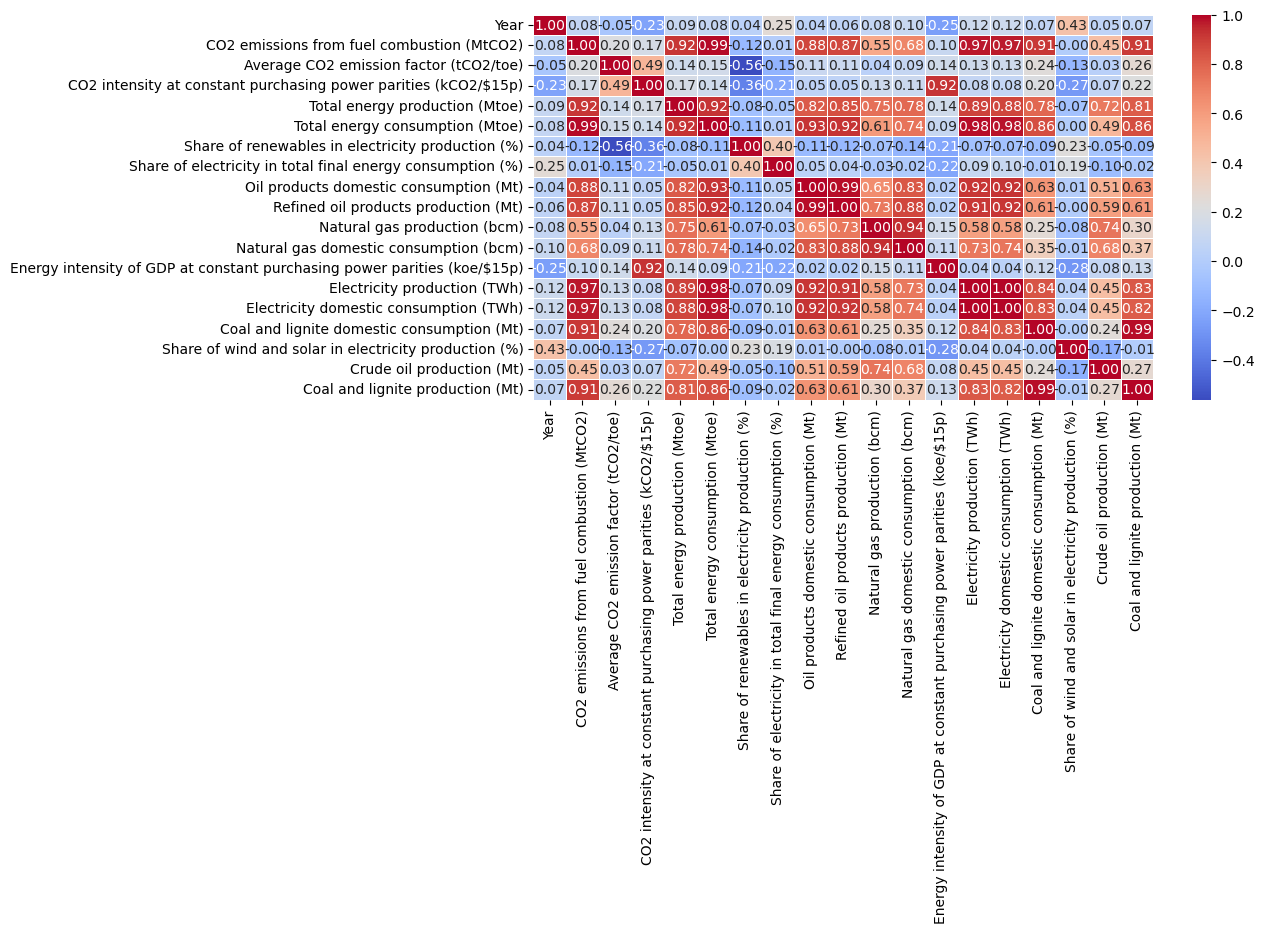

In [55]:
fig, ax = plt.subplots(figsize= (10, 5))
correlation_matrix2 = df.corr()
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [56]:
# All types of energy production and Consumption have strong positive correlation
# Energy intensity and Co2 intensity at power purchasing power parities have strong positive correlation

# All types of energy production and Consumption have strong positive correlation with Co2 emissions except share of renewables in electricity production
# share of renewables in electricity production have strong negative correlation with Co2 emissions

# share of solar and wind has negative correlation with Co2 emissions